In [1]:
# Importing some libraries we're going to need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from pandas.plotting import scatter_matrix

# Getting the data

In [2]:
results = pd.read_csv('results.csv')
driver_standings = pd.read_csv('driver_standings.csv')
constructor_standings = pd.read_csv('constructor_standings.csv')

In [3]:
results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [4]:
results.dtypes

resultId             int64
raceId               int64
driverId             int64
constructorId        int64
number              object
grid                 int64
position            object
positionText        object
positionOrder        int64
points             float64
laps                 int64
time                object
milliseconds        object
fastestLap          object
rank                object
fastestLapTime      object
fastestLapSpeed     object
statusId             int64
dtype: object

In [5]:
driver_standings.head()

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0


In [6]:
driver_standings.dtypes

driverStandingsId      int64
raceId                 int64
driverId               int64
points               float64
position               int64
positionText          object
wins                   int64
dtype: object

In [7]:
constructor_standings.head()

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
0,1,18,1,14.0,1,1,1
1,2,18,2,8.0,3,3,0
2,3,18,3,9.0,2,2,0
3,4,18,4,5.0,4,4,0
4,5,18,5,2.0,5,5,0


In [8]:
constructor_standings.dtypes

constructorStandingsId      int64
raceId                      int64
constructorId               int64
points                    float64
position                    int64
positionText               object
wins                        int64
dtype: object

# Dropping the columns we don't need

In [9]:
# We only need a few columns, which we're getting here
results = results[["raceId", "driverId", "constructorId", "grid", "position"]]
results.head()

,raceId,driverId,constructorId,grid,position
0,18,1,1,1,1
1,18,2,2,5,2
2,18,3,3,7,3
3,18,4,4,11,4
4,18,5,1,3,5


In [10]:
driver_standings = driver_standings[["raceId", "driverId", "position"]]
# Rename the "position" column do avoid conflict with the "position" column from results.csv
driver_standings = driver_standings.rename(columns={"position": "driverStanding"})
# Use current driver standings for the next race
driver_standings["raceId"] += 1
driver_standings.head()

,raceId,driverId,driverStanding
0,19,1,1
1,19,2,2
2,19,3,3
3,19,4,4
4,19,5,5


In [11]:
# Again, picking the columns we need and renaming "position"
constructor_standings = constructor_standings[["raceId", "constructorId", "position"]]
constructor_standings = constructor_standings.rename(columns={"position": "constructorStanding"})
# Use current constructor standings for the next race
constructor_standings["raceId"] += 1
constructor_standings.head()

,raceId,constructorId,constructorStanding
0,19,1,1
1,19,2,3
2,19,3,2
3,19,4,4
4,19,5,5


# Joining the data

In [12]:
# Joining results with driver standings. This will add the "driverPosition" column to our results
results_driver_standings = pd.merge(results, driver_standings, on=["raceId", "driverId"], how="inner")
results_driver_standings.head()

,raceId,driverId,constructorId,grid,position,driverStanding
0,18,1,1,1,1,5
1,18,2,2,5,2,13
2,18,3,3,7,3,7
3,18,4,4,11,4,9
4,18,5,1,3,5,12


In [13]:
# Now we join the constructor standings and we end up with everything we need in one place
joined_data = pd.merge(results_driver_standings, constructor_standings, on=["raceId", "constructorId"], how="inner")
joined_data.head()

,raceId,driverId,constructorId,grid,position,driverStanding,constructorStanding
0,18,1,1,1,1,5,3
1,18,5,1,3,5,12,3
2,18,2,2,5,2,13,6
3,18,9,2,2,\N,14,6
4,18,3,3,7,3,7,7


In [14]:
joined_data.sort_values(by='raceId', ascending=False).head(60)

,raceId,driverId,constructorId,grid,position,driverStanding,constructorStanding
22157,1096,825,210,16,17,13,8
22147,1096,4,214,10,\N,9,4
22138,1096,830,9,1,1,1,1
22139,1096,815,9,2,3,3,1
22140,1096,844,6,3,2,2,2
22141,1096,832,6,4,4,6,2
22142,1096,847,131,6,5,4,3
22144,1096,846,1,7,6,7,5
22145,1096,817,1,13,9,12,5
22146,1096,839,214,8,7,8,4


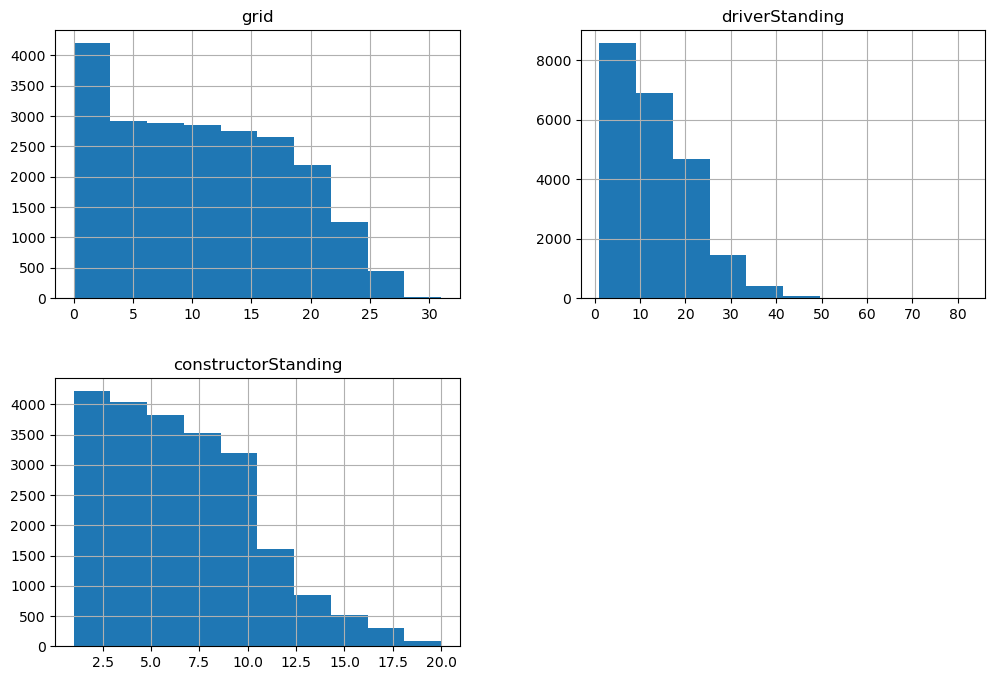

In [16]:
joined_data[["grid", "driverStanding", "constructorStanding", "position"]].hist(figsize=(12, 8))
plt.show()

In [17]:
joined_data[["grid", "driverStanding", "constructorStanding", "position"]].agg(['min', 'max'])

,grid,driverStanding,constructorStanding,position
min,0,1,1,1
max,31,82,20,\N


Something looks fishy here.
1. Why do we have grid positions over 20 when we know that the maximum number of cars that can start a race is currently set at 20 by the FIA.
2. Why is the min grid position 0?
2. Why is there an "\N" as the max value for positions?

In the 1st case, I've got a hunch that it has to do with the really old data in our dataset. We'll try to look back only up to 10 years and see if that makes any difference.
Regarding the 2nd and 3rd points - we'll deal with that when we clean our data.

In [18]:
# Finding out the first race ID of the year 2013
# Doing this so that we can get rid of races oleder than 10 years from our dataset
races = pd.read_csv('races.csv')
races.loc[races['year'] == 2013].sort_values(by="raceId", ascending=True).head()
# The answer is 880

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
878,880,2013,1,1,Australian Grand Prix,2013-03-17,06:00:00,http://en.wikipedia.org/wiki/2013_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
879,881,2013,2,2,Malaysian Grand Prix,2013-03-24,08:00:00,http://en.wikipedia.org/wiki/2013_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
880,882,2013,3,17,Chinese Grand Prix,2013-04-14,07:00:00,http://en.wikipedia.org/wiki/2013_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
881,883,2013,4,3,Bahrain Grand Prix,2013-04-21,12:00:00,http://en.wikipedia.org/wiki/2013_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
882,884,2013,5,4,Spanish Grand Prix,2013-05-12,12:00:00,http://en.wikipedia.org/wiki/2013_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [19]:
# Removing all races before 2013 from our dataset
joined_data = joined_data[joined_data["raceId"] > 880]
joined_data.head()

,raceId,driverId,constructorId,grid,position,driverStanding,constructorStanding
18241,881,20,9,1,1,3,3
18242,881,17,9,5,2,6,3
18243,881,1,131,4,3,5,4
18244,881,3,131,6,4,20,4
18245,881,13,6,2,5,4,1


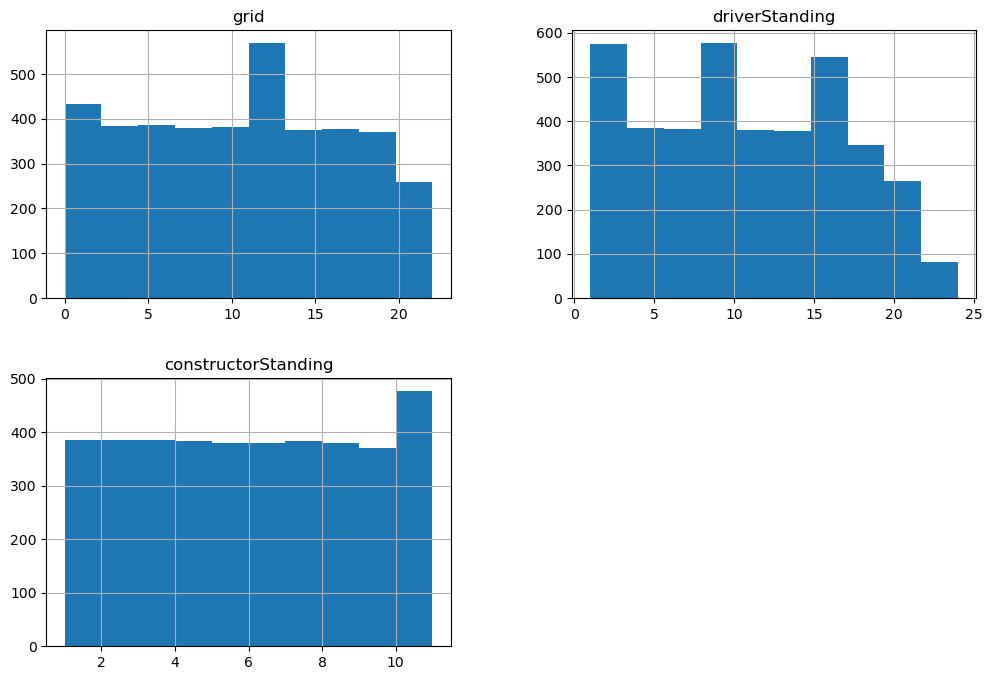

In [20]:
joined_data[["grid", "driverStanding", "constructorStanding", "position"]].hist(figsize=(12, 8))
plt.show()

Things look slightly better now. We can carry on with data cleaning.

# Cleaning the data

In [21]:
# Getting rid of a few more columns that we don't need anymore
dataset = joined_data[["grid", "driverStanding", "constructorStanding", "position"]]
joined_data.head()

,raceId,driverId,constructorId,grid,position,driverStanding,constructorStanding
18241,881,20,9,1,1,3,3
18242,881,17,9,5,2,6,3
18243,881,1,131,4,3,5,4
18244,881,3,131,6,4,20,4
18245,881,13,6,2,5,4,1


In [22]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3916 entries, 18241 to 22157
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   grid                 3916 non-null   int64 
 1   driverStanding       3916 non-null   int64 
 2   constructorStanding  3916 non-null   int64 
 3   position             3916 non-null   object
dtypes: int64(3), object(1)
memory usage: 153.0+ KB


In [23]:
# Filter out rows where the position is not numeric (remember the "\N" before?)
dataset = dataset[dataset.position.apply(lambda x: x.isnumeric())]
# Filter out rows where grid is 0
dataset = dataset[dataset.grid.apply(lambda x: x > 0)]
# Change type for position values to integers
dataset.position = dataset.position.astype('int')

dataset

,grid,driverStanding,constructorStanding,position
18241,1,3,3,1
18242,5,6,3,2
18243,4,5,4,3
18244,6,20,4,4
18245,2,4,1,5
...,...,...,...,...
22153,18,10,6,15
22154,19,19,10,13
22155,20,20,10,19
22156,12,16,8,16


# Looking at correlations
Using `corr()`, we can get the standard correlation coefficient between our label and each attribute. The closer to 1, the stronger the correlation.

In [24]:
dataset.corr()["position"]

grid                   0.750109
driverStanding         0.742595
constructorStanding    0.750760
position               1.000000
Name: position, dtype: float64

We can also visualise the correlations using `scatter_matrix()`

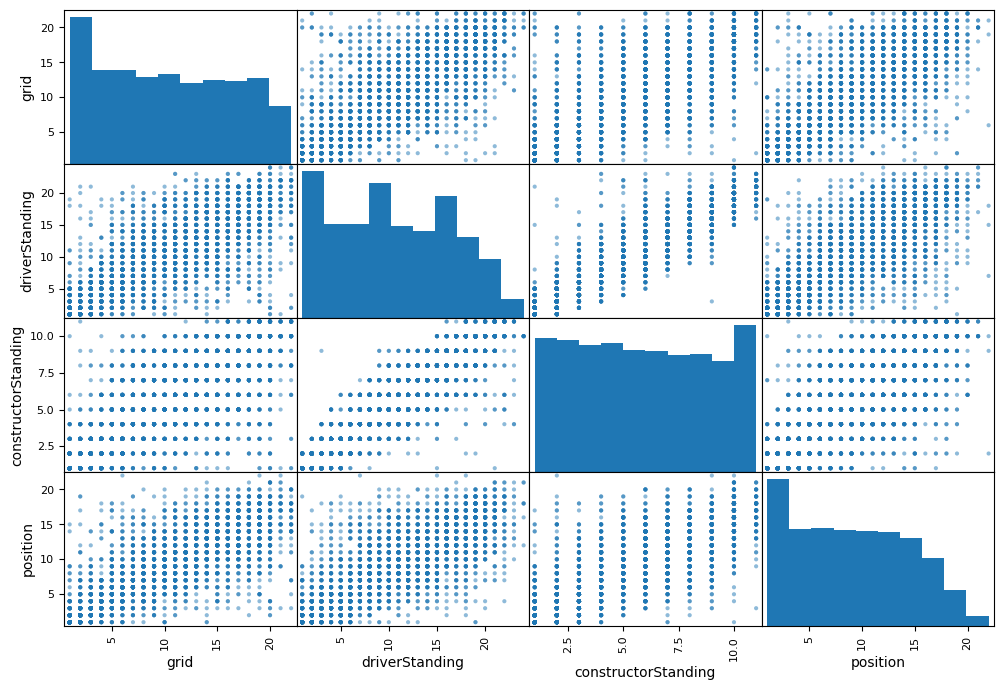

In [25]:
scatter_matrix(dataset, figsize=(12,8))
plt.show()

Another nice way to do visualise correlations is with bi-dimensional histograms.

max_grid = 22; max_position = 22; max_d_position = 24; max_c_position = 11


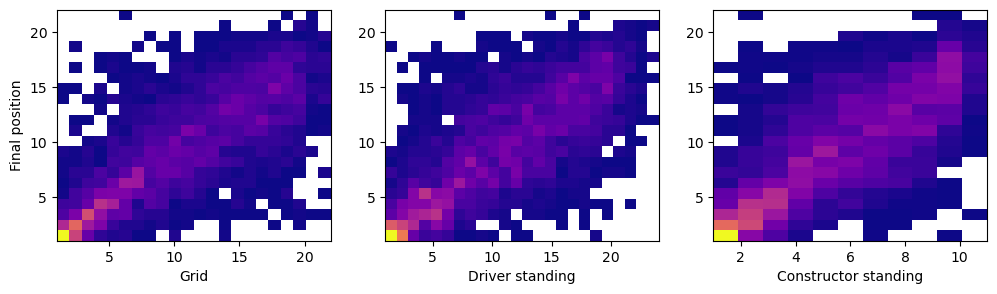

In [26]:
fig,ax = plt.subplots(1, 3, figsize=(12, 3))

# https://stackoverflow.com/a/20105673/3015186
max_grid = dataset.grid.max()
max_position = dataset.position.max()
max_d_position = dataset.driverStanding.max()
max_c_position = dataset.constructorStanding.max()
print(f"max_grid = {max_grid}; max_position = {max_position}; max_d_position = {max_d_position}; max_c_position = {max_c_position}")

ax[0].hist2d(dataset.grid, dataset.position, (max_grid, max_position), cmap='plasma', cmin=1)
ax[0].set_xlabel("Grid")
ax[0].set_ylabel("Final position")
ax[1].hist2d(dataset.driverStanding, dataset.position, (max_d_position, max_position), cmap='plasma', cmin=1)
ax[1].set_xlabel("Driver standing")
ax[2].hist2d(dataset.constructorStanding, dataset.position, (max_c_position, max_position), cmap='plasma', cmin=1)
ax[2].set_xlabel("Constructor standing")

plt.show()

What we see above is that there is a linear relationship between all our features and the final results, which is good, but data pints are also very dispersed, meaning that our predictions will probably not be very accurate.

In [27]:
# Split dataset in training X and y
x_train = dataset[['grid', 'driverStanding', 'constructorStanding']].values
y_train = dataset[['position']].values.reshape(-1) # Transforming to a 1D array
print(f'{x_train.shape}; {y_train.shape}')
print(x_train)
print(y_train)

(3258, 3); (3258,)
[[ 1  3  3]
 [ 5  6  3]
 [ 4  5  4]
 ...
 [20 20 10]
 [12 16  8]
 [16 13  8]]
[ 1  2  3 ... 19 16 17]


Next we want to implement the cost function $J(\mathbf{w},b)$:
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 $$ 
where:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b $$ 

In [28]:
def compute_cost(x, y, w, b):
    m = x.shape[0]
    cost = 0
    for i in range(m):
        f_i = x[i].dot(w) + b
        cost += (f_i - y[i]) ** 2
    return cost / (2 * m)

Let's try out the cost function with all weights and bias initialised to 0

In [29]:
w_init = [0, 0, 0]
b_init = 0

In [30]:
# Calculate cost for initial w and b
cost = compute_cost(x_train, y_train, w_init, b_init)
print(f"Cost = {cost}")

Cost = 55.43278084714549


**Spoiler alert !!!**

Now we'll run the cost function again but with the trained weights and bias (after around 25k iterations, when the algorithm converged)

In [31]:
# Spoiler: Here are the trained weights and bias
cost = compute_cost(x_train, y_train, [0.35008161, 0.04341071, 0.27482694], 2.0513445619234765)
print(f"Cost = {cost}")

Cost = 6.637608134053078


See how the cost went from over 55 down to around 6.

Now we want to implement the gradient descent function for multiple variables:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline\;
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j}  \; & \text{for j = 0..n-1}\newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$

where, n is the number of features, parameters $w_j$,  $b$, are updated simultaneously and where  

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)}  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})
\end{align}
$$
* m is the number of training examples in the data set

    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target value

First we go ahead and implement a function to calculate the gradient and then another to calculate the gradient descent.

In [32]:
def compute_gradient(x, y, w, b):
    # Get number of examples and features
    m, n = x.shape
    # Initialise gradient of the cost w.r.t the parameters w
    dj_dw = np.zeros((n,))
    # Initialise gradient of the cost w.r.t the parameter b
    dj_db = 0.
    
    for i in range(m):
        loss = (x[i].dot(w) + b) - y[i] # Loss is the same for both derivatives
        for j in range (n):
            dj_dw[j] += loss * x[i][j] 
        dj_db += loss
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    return dj_dw, dj_db
    

In [33]:
# Let's try to compute the gradient for our initial weights and bias
compute_gradient(x_train, y_train, w_init, b_init)

(array([-118.62400246, -120.44229589,  -61.77931246]), -9.169429097605892)

In [34]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    # Store history of costs (J). This will be used when we print out the progress.
    J_history = []

    w = copy.deepcopy(w_in)
    b = b_in
    
    # Apply gradient descent num_iters times
    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient(X, y, w, b)
        # Update w and b based on gradient, at the same time (this is important)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        J_history.append(compute_cost(X, y, w, b))
            
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i % math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.8f}   ")
    
    return w, b, J_history

In [35]:
import copy, math

# Initial values taken from a previous descent, so as not to start from 0
initial_w = np.array([0.37888087, 0.05009108, 0.32510837])
initial_b = 2.7796157637505052
iterations = 10000
alpha = 3.5e-3

print("Running gradient descent...")
w_final, b_final, J_hist = gradient_descent(x_train, y_train, initial_w, initial_b, compute_cost, compute_gradient, alpha, iterations)
print(f"b = {b_final}; w = {w_final} ")

# Expecting something close to: b = 1.1346913859860654; w = [0.34919898 0.16862326 0.47748792]

Running gradient descent...
Iteration    0: Cost 4.98900555   
Iteration 1000: Cost 4.68054531   
Iteration 2000: Cost 4.62995299   
Iteration 3000: Cost 4.61832210   
Iteration 4000: Cost 4.61564821   
Iteration 5000: Cost 4.61503350   
Iteration 6000: Cost 4.61489218   
Iteration 7000: Cost 4.61485969   
Iteration 8000: Cost 4.61485222   
Iteration 9000: Cost 4.61485050   
b = 1.1346913859860654; w = [0.34919898 0.16862326 0.47748792] 



Above we see that that over time the cost keeps decresing and eventually starts to converge (is decreasing very slowly). It is not very obvious because the initial weights I used are already trained. If you try to run this starting from all zeroes, for more iterations and maybe with a slightly larger rate (alpha) then you'll observe it better.

Below I'm iterating over a few examples and generate some predictions, just to get an idea of how well we did.

In [44]:
accuracy=[]

for i in range(x_train.shape[0]):
    f = x_train[i].dot(w_final) + b_final
    prediction = np.round(f).astype(int)
    
    actual = y_train[i]
    accuracy.append((abs(100 - (abs(prediction - actual) / actual) * 100.0))
    #print(f"Prediction: {prediction:3d}, Actual position: {actual:3d}, 
#     Accuracy: {100 - (abs(prediction - actual) / actual) * 100.0:3.0f}%")

In [45]:
suma=0
for i in accuracy:
    suma+=i
print(suma/len(accuracy))

59.23344844933413


Now let's see what's the avergae difference between our prediction and the actual result. In other words, by how many positions are we off on average when making the predictions.

In [40]:
differences = np.zeros(x_train.shape[0])
for i in range(x_train.shape[0]):
    f = x_train[i].dot(w_final) + b_final
    prediction = np.round(f).astype(int)
    actual = y_train[i]
    differences[i] = abs(prediction-actual)
print(f"Average difference: {np.average(differences):2.0f}")

Average difference:  2


# The Model
So what's our model? Well, here it is:

In [41]:
def predict(grid, driver_standing, constructor_standing):
    prediction = np.array([grid, driver_standing, constructor_standing]).dot([0.34919898, 0.16862326, 0.47748792]) 
                            + 1.1346913859860654
    return np.round(prediction).astype(int)

Let's take it for a spin then!
Given a driver starts 3rd on the grid, he's 5th in the driver standings and his team is 2nd in the constructor standings, we predict that he's going to finish.... :drumroll:

In [42]:
predict(3, 5, 2)

4

And the answer is **4**!

# Predictions for Australian GP 2023
I'll be choosing three drivers to put our model to test.

In [45]:
VER = predict(1, 1, 1)
RUS = predict(2, 6, 3)
TSU = predict(12, 14, 9)
print(f"Predictions: VER - {VER}, RUS - {RUS}, TSU - {TSU}")

Predictions: VER - 2, RUS - 4, TSU - 12


| Driver name        | Driver standing | Constructor standing | Grid position | Predicted finishing position |
|--------------------|-----------------|----------------------|---------------|------------------------------|
| **Max Verstappen** |1                |1                     |1              |2                             |
| **George Russell** |6                |3                     |2              |4                             |
| **Yuki Tsunoda**   |14               |9                     |12             |12                            |

Straight away I can say that Verstappen is more likely to finish 1st here, but I'll givew our model the benefit of the doubt.

In [46]:
results = pd.read_csv('results.csv')
driver_standings = pd.read_csv('driver_standings.csv')
constructor_standings = pd.read_csv('constructor_standings.csv')

In [47]:
results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [48]:
driver_standings.head()

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0


In [57]:
pitstops=pd.read_csv('pit_stops.csv')
pitstops = pitstops.rename(columns={"time": "pitstop_time", "milliseconds": "pitstop_ms", "lap": "pitstop_lap"})
pitstops.head()

,raceId,driverId,stop,pitstop_lap,pitstop_time,duration,pitstop_ms
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842


In [58]:
laptimes=pd.read_csv('lap_times.csv')
laptimes = laptimes.rename(columns={"time": "laptimes_time", "milliseconds": "laptimes_ms", "lap": "laptimes_lap"})
laptimes.head()

,raceId,driverId,laptimes_lap,position,laptimes_time,laptimes_ms
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342


In [ ]:
new_times = pd.merge(results_driver_standings, constructor_standings, on=["raceId", "constructorId"], how="inner")
joined_data.head()

In [66]:
# Load in the datasets
driv  =pd.read_csv("drivers.csv")
result=pd.read_csv("results.csv")
race  =pd.read_csv("races.csv")
m1=pd.merge(result,driv,on='driverId')
m2=pd.merge(m1,race,on='raceId')
result_v2=m2[m2.year>2009]

In [67]:
result_v2["driver"] = result_v2["forename"] + " " + result_v2["surname"]
avg_pts   = result_v2[['driver','points']].groupby("driver").mean()
total_pts = result_v2[['driver','points']].groupby("driver").sum()
n=result_v2[['driver','raceId']].groupby("driver").count()
num_races=n[n.raceId>100]

/var/folders/hz/47860bw92z797sc4tg_x_8240000gq/T/ipykernel_24029/2780549494.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_v2["driver"] = result_v2["forename"] + " " + result_v2["surname"]


In [68]:
d =pd.merge(avg_pts,total_pts,on='driver')
md=pd.merge(d,num_races,on='driver')
md = md.reset_index()
md.iloc[7,3]=180 #data correction
md.iloc[6,3]=125 #data correction

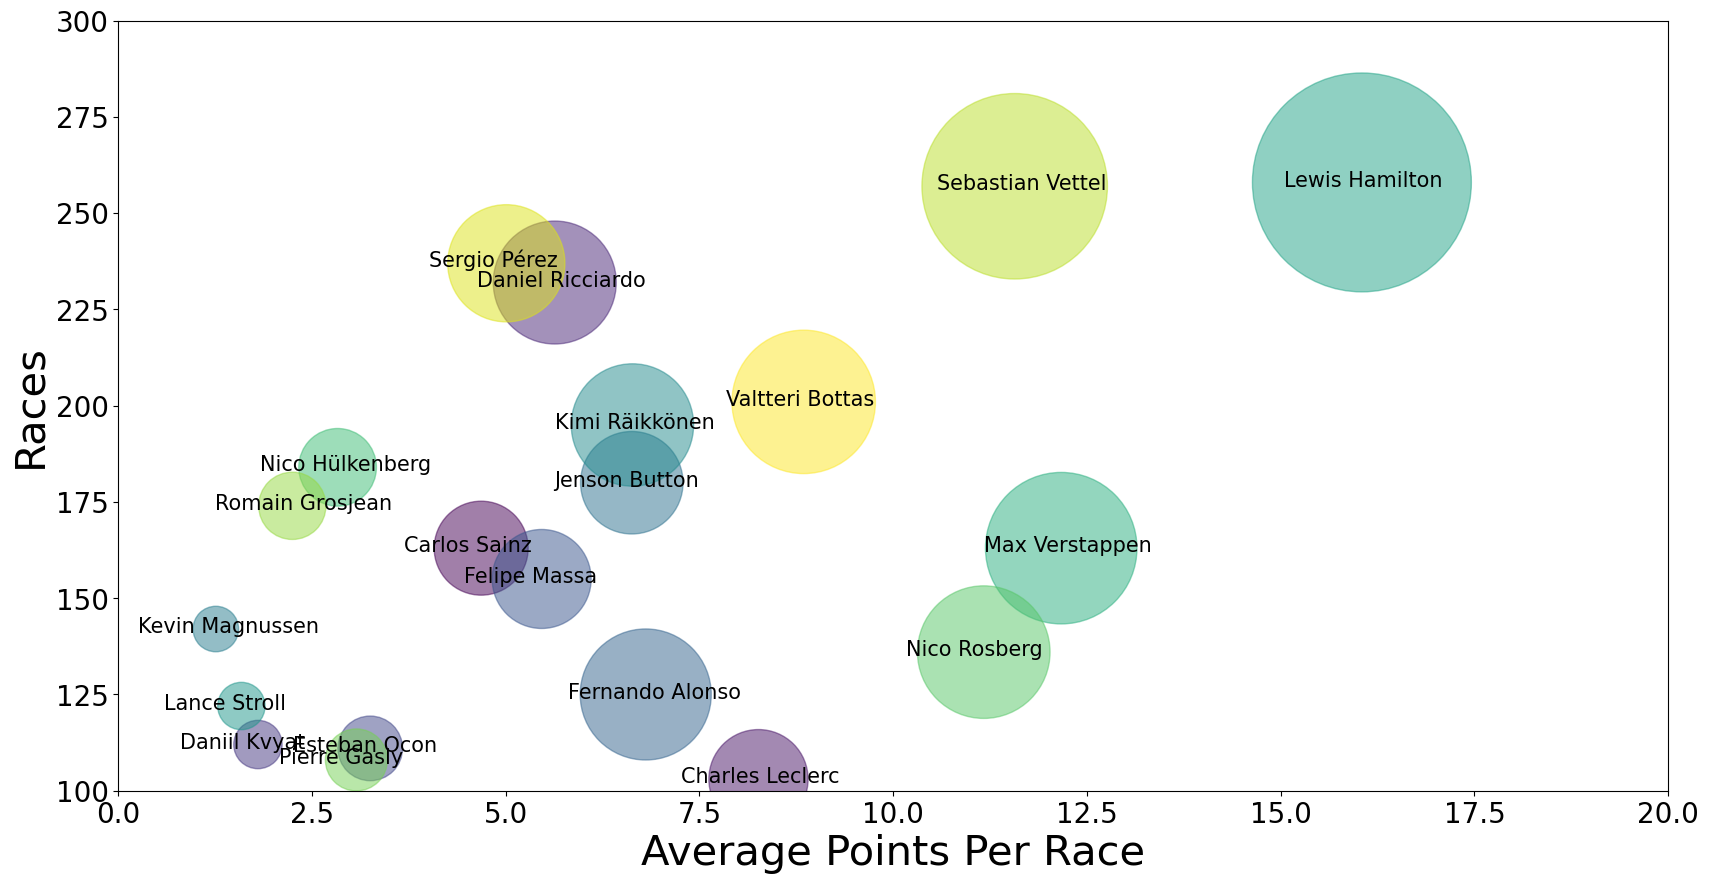

In [71]:
plt.rc('font', size=15)          # controls default text sizes
plt.rc('axes', titlesize=30)     # fontsize of the axes title
plt.rc('axes', labelsize=30)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.rc('legend', fontsize=30)    # legend fontsize
plt.rc('figure', titlesize=30)   # fontsize of the figure title

plt.figure(figsize=(20,10))
plt.scatter(md.points_x,md.raceId,s=md.points_y*6,alpha=0.5,c=md.index.to_series())
plt.xlim(0,20)
plt.ylim(100,300)

plt.xlabel("Average Points Per Race")
plt.ylabel("Races")

for x,y,z in zip(md.points_x,md.raceId,md.driver):
   plt.annotate(z,xy=(x-1,y-1))

In [47]:
accuracy=[]
predict=[]
act=[]
for i in range(x_train.shape[0]):
    f = x_train[i].dot(w_final) + b_final
    prediction = np.round(f).astype(int)
    predict.append(prediction)
    actual = y_train[i]
    act.append(actual)
    accuracy.append((abs(100 - (abs(prediction - actual) / actual) * 100.0)))
    #print(f"Prediction: {prediction:3d}, Actual position: {actual:3d}, 
#     Accuracy: {100 - (abs(prediction - actual) / actual) * 100.0:3.0f}%")

In [56]:
import math

def calculate_rmse(actual, predicted):
    """
    Calculate Root Mean Squared Error (RMSE) between two lists of actual and predicted values.
    """
    if len(actual) != len(predicted):
        raise ValueError("Input lists must have the same length")

    n = len(actual)
    squared_errors = [((actual[i] - predicted[i]))**2 for i in range(n)]
    mean_squared_error = sum(squared_errors) / n
    rmse = math.sqrt(mean_squared_error)

    return rmse


In [57]:
rmse=calculate_rmse(act,predict)
print(rmse)

3.0426677254772896
